# NumPy  SciPy

In [1]:
import numpy as np

## Задание 1 ★★☆

Разбейте массив на убывающие подмассивы.  
Подсказка: np.diff()  
Используйте библиотеку `numpy`, не используйте циклы.

In [53]:
def function_1(arr):
    split_idx = np.where(np.diff(arr)>=0)[0]
#     print(arr, split_idx+1)
#     print(np.split(arr, split_idx+1))
    return np.split(arr, split_idx+1)

In [54]:
function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])

[array([3, 2, 1]), array([4]), array([5, 2, 0]), array([2]), array([4, 1])]

In [55]:
len(function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])) == 5

True

In [56]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 10, size=20))) == 9

True

In [57]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 100, size=10))) == 4

True

Значение для формы

In [58]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
print(len(function_1(a)))

505


## Задание 2 ★★☆

Дан массив arr, необходимо найти среднее значение внутри групп, группа определена массивом g. Например, для  
`arr = [4, 2, 1, 5, 2, 5, 1, 3]` и   
`g =   [0, 1, 1, 0, 1, 0, 1, 0]` (4 относится к группе 0, 2 к группе 1 и т. д.)   
Средние по группам: `[4.25, 1.5]`  
Подсказка: `np.bincount()`   
Используйте библиотеку `numpy`, не используйте циклы.

In [86]:
def function_2(arr, g):
    result = []
    for g_i in np.unique(g):
        idx = np.where(g==g_i)[0]
        result.append(arr[idx].mean())
    return np.array(result)

Проверочный код

In [87]:
all(function_2(np.array([4, 2, 1, 5, 2, 5, 1, 3]), np.array([0, 1, 1, 0, 1, 0, 1, 0])) == [4.25, 1.5])

True

In [88]:
np.random.seed(42)
all(function_2(np.random.randint(0, 25, size=10), np.random.randint(0, 3, size=10)) == [12., 15.2, 10.])

True

In [89]:
np.random.seed(42)
all(function_2(np.random.randint(0, 100, size=10), np.random.randint(0, 4, size=10)) == [89., 78., 20., 54.])

True

Значение для формы

In [90]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
g = np.random.randint(0, 20, 1000)
print(np.round(function_2(a, g).sum(), 4))

30021.8043


## Задание 3 ★★★

Предположим нам даны две выборки-матрицы: обучающая X_train (размер l1 x n) и тестовая X_test (размер l2 x n), каждая строка в матрице - это вектор, описывающий объект в n-мерном пространстве. Допустим, что в ходе некоторой задачи потребовалось вычислить расстояние между векторами из тестовой и обучающей выборки. То есть для каждой строки-вектора из тестовой выборки нужно найти расстояние до каждого вектора из обучающей, таким образом мы получим матрицу dist размера l1 x l2.   

В этом задании необходимо получить матрицу расстояний dist, **не используя циклы**.
Для начала, попробуйте это сделать через два цикла и сравните эффективность с конечной реализацией через numpy.  

In [107]:
from numpy.linalg import norm

def function_3(X_train, X_test):
    result = np.empty(shape=(X_train.shape[0], X_test.shape[0]))
    for i, x in enumerate(X_test):
        result[:, i] = np.sqrt(np.sum((X_train-x)**2, axis=1))
    return result

In [114]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
x = [[1,1,1], [1,0,0]]
print(a-x)
# print((a-x)**2)
# np.sqrt(np.sum((a-x)**2, axis=1))

ValueError: operands could not be broadcast together with shapes (3,3) (2,3) 

Значение для формы

In [115]:
%%time
np.random.seed(42)
X_train, X_test = np.random.rand(60000, 3000), np.random.rand(1000, 3000)
dist = function_3(X_train, X_test)
print(np.round(dist.sum(), 4))

1341747083.8534
CPU times: user 6min 54s, sys: 1min 26s, total: 8min 21s
Wall time: 8min 21s


## Задание 4 ★☆☆

Реализуйте функцию вычисляющую приближенную матрицу $X_k$  для матрицы $X$ заданного ранга $k$ по норме Фробениуса.   
Подсказка:   
см. семнар SciPy  
scipy.linalg.svd  

In [122]:
import scipy
from scipy.linalg import svd

In [178]:
def function_4(X, k):
    U, s, Vh = svd(X, full_matrices=False)
    s = np.eye(len(s))*s
    U = U[:,:k]
    s = s[:k, :k]
    Vh = Vh[:k]
    print(U.shape, s.shape, Vh.shape)
    
    Xk = np.matmul(U, np.matmul(s, Vh))
    print(X) 
    print(Xk)
    return Xk

Проверка

In [179]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 3)
(scipy.linalg.norm(X - X_k) < 2 and np.linalg.matrix_rank(X_k) == 3)

(4, 3) (3, 3) (3, 5)
[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]
 [4 1 7 5 1]]
[[6.29395613 3.93074059 6.49802023 4.37786463 5.25809381]
 [8.81837437 1.4249266  6.31015646 6.76653012 4.45839895]
 [2.85604946 6.54421563 7.24581987 1.8149594  5.36331202]
 [4.04025138 1.12744621 6.93126396 5.05174097 0.89841086]]


True

In [180]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 4)
(scipy.linalg.norm(X - X_k) < 1e-10 and np.linalg.matrix_rank(X_k) == 4)

(4, 4) (4, 4) (4, 5)
[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]
 [4 1 7 5 1]]
[[6. 3. 7. 4. 6.]
 [9. 2. 6. 7. 4.]
 [3. 7. 7. 2. 5.]
 [4. 1. 7. 5. 1.]]


True

Значение для формы

In [181]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(100, 150))
X_k = function_4(X, 40)
print(np.round(scipy.linalg.norm(X - X_k), 3) * np.linalg.matrix_rank(X_k))

(100, 40) (40, 40) (40, 150)
[[6 3 7 ... 8 3 8]
 [2 6 5 ... 5 2 8]
 [4 7 0 ... 0 0 2]
 ...
 [6 1 0 ... 5 2 3]
 [0 7 0 ... 4 9 3]
 [2 0 4 ... 1 5 6]]
[[4.80720966 1.06853647 5.49038852 ... 9.25476259 5.17258451 8.56464183]
 [2.87791181 6.74058141 4.53021483 ... 5.19206556 0.44894201 8.44726114]
 [3.56713343 7.65493779 0.15812988 ... 0.03064089 1.94672964 3.1342966 ]
 ...
 [3.68891063 2.05509514 3.05259116 ... 3.44405992 2.64163339 3.06659287]
 [1.76922338 4.96491226 0.72520991 ... 3.92744352 7.02023693 2.80540131]
 [0.99071952 0.46317761 5.83741007 ... 3.63716643 5.39044931 3.81105155]]
7279.84


## Задание 5 ★★☆

Найдите тангенс угла наклона прямой, такой что максимальное расстояние от точек $X$ до прямой минимально. Cчитайте, что прямая проходит через начало координат.

In [184]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, :2]

In [284]:
from scipy import interpolate
from scipy.linalg import inv

def function_5(points):
    X = points[:, 0].reshape((len(points), 1))
    y = points[:, 1].reshape((len(points), 1))
    X_ = np.matmul(X.T, X)
    X_ = inv(X_)
    X_ = np.matmul(X_, X.T)
    w = np.matmul(X_,y)
    return w[0][0]

In [285]:
function_5(X)

1.3086742363117634

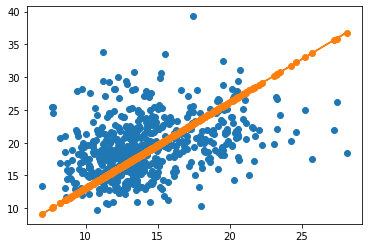

In [287]:
from scipy import interpolate

w = function_5(X)
xs = X[:, 0]
ys = X[:, 1]
plt.plot(xs, ys, 'o')
plt.plot(xs, w*xs, '-o')
plt.show()

Значение для формы

In [288]:
print(round(function_5(X), 3))

1.309
